In [ ]:
# import preCV, CPE, postCV, GC data
# plot CVs and CPE
# calculate charges
# calculate FE
# output text file with H2 %, mmol, FE

In [ ]:
import matplotlib.pyplot as plt
import sys

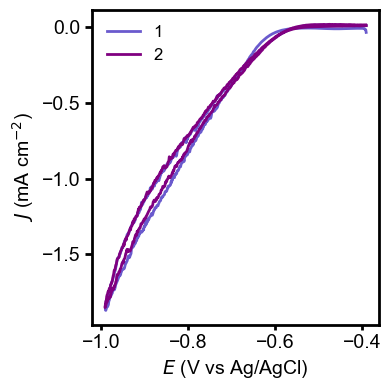

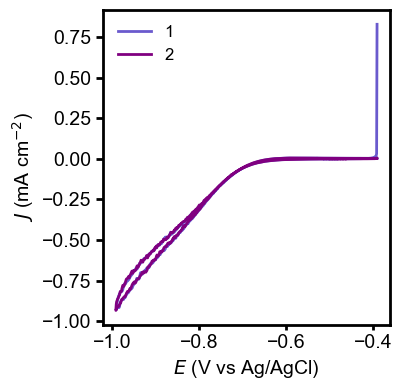

In [1]:
# CVs
# define file path
CVpre = f'{path}\CYM23-preCV.ids'
CVpost = f'{path}\CYM23-postCV.ids'

# Import for plotting CVs and return figure and charges
from Echem_Data_Analysis.CV_Analysis import CV_Analysis

CVpre_fig, CVpre_charges = CV_Analysis(CVpre, 'CVpre')
CVpost_fig, CVpost_charges = CV_Analysis(CVpost, 'CVpost')

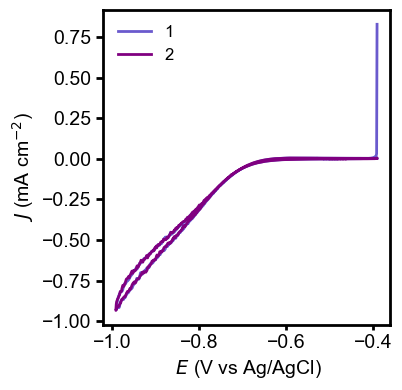

In [2]:
plt.figure(CVpost_fig)  # Select figure
plt.show()

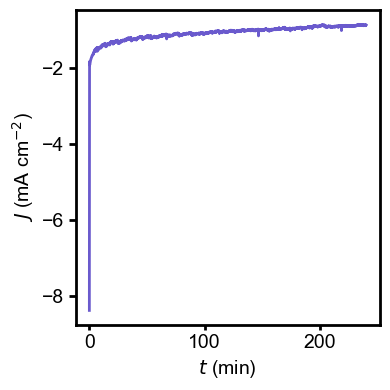

In [2]:
#CPE
from Echem_Data_Analysis.CPE_Analysis import CPE_Analysis

CPE = f'{path}\CPE4h.idf'

CPE_fig, CPE_charge = CPE_Analysis(CPE, 'CPE')

In [4]:
# list to store charges
charges = []
charges.extend(CVpre_charges)
charges.extend(CVpost_charges)
charges.append(CPE_charge)
charges

[-0.05937985605909997,
 -0.05857450360290002,
 -0.024322361921870022,
 -0.02440814770502347,
 -2.94050805]

In [5]:
pos_charges = [abs(num) for num in charges]
total_charge = sum(pos_charges)
total_charge

3.1071929192888934

In [ ]:
# save figures
code = 'MS291-1'

plt.figure(CVpre_fig)
plt.savefig(f'{code} CVpre')
plt.close()

plt.figure(CVpost_fig)
plt.savefig(f'{code} CVpost')
plt.close()

plt.figure(CPE_fig)
plt.savefig(f'{code} CPE')
plt.close()

In [6]:
# GC data
H2_area = 75532
CH4_area = 348014

CH4_percent = 0.02
H2_RF = 0.101
headspace = 8 # mL
molarvol_mL_per_mol = 24478 #mL/mol

integral_ratio = H2_area / CH4_area
H2_percent = (integral_ratio * CH4_percent) / H2_RF
H2_mL = H2_percent * headspace
H2_mol = H2_mL / molarvol_mL_per_mol
H2_umol = H2_mol * 1000000

H2_umol

14.786165088023862

In [7]:
# Faradaic Efficiency
Z = 2 # number of electrons
F = 96485 # faradays constant

FE = (H2_mol * Z * F * 100) / total_charge
FE

91.82842363354003